In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
sns.set()

## Data Import 

In [67]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")
col = train.columns

In [68]:
#Data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
f=128903 #bullet styling
col # Colum names
for i, n in enumerate(col):
    print("{:c} index: {}  column name: {}".format(f,i,n))

🞇 index: 0  column name: PassengerId
🞇 index: 1  column name: Survived
🞇 index: 2  column name: Pclass
🞇 index: 3  column name: Name
🞇 index: 4  column name: Sex
🞇 index: 5  column name: Age
🞇 index: 6  column name: SibSp
🞇 index: 7  column name: Parch
🞇 index: 8  column name: Ticket
🞇 index: 9  column name: Fare
🞇 index: 10  column name: Cabin
🞇 index: 11  column name: Embarked


## Preprocessing:

In [70]:
def toDoPrint(List,f):
    str =""
    temp = ""
    for i in List:
        temp ="{:c} {}".format(f,i)
        print(temp)
        str += temp + "\n"
    return str
        
        
        
Todo = {"Missing data: Age, Cabin, Embarked",
        "Handling Data","Convert string values to numeric", 
        "Remove cols that do not contribute: Name, Cabin, Ticket and ?"
    }

todo_list = toDoPrint(Todo,f)

🞇 Remove cols that do not contribute: Name, Cabin, Ticket and ?
🞇 Handling Data
🞇 Missing data: Age, Cabin, Embarked
🞇 Convert string values to numeric


In [75]:
def sexRatio(data):
    """m = male 
       f = female
       t = Total
       return an array [men%, female%, Total]
    """
    m=data.Sex[train.Sex=="male"].count()
    f=data.Sex[train.Sex=="female"].count()
    t=m+f
    return [m/t*100,f/t*100,t]

In [76]:
def sumList(a,b):
    """return corresponding sum of each elements"""
    length = len(a)
    if(length != len(b)):
        print("A and B are not the same length")
        return []
    
    sum_v =[]
    for i in range(0,length):
        sum_v.append(a[i]+b[i])
        
    return sum_v
    
    
def pieChart(data, data1=[], both=False):
  
    
    if(both):
        ratio = sumList(sexRatio(data),sexRatio(data1))
    else:
        ratio = sexRatio(data)
    
    labels = 'Male', 'Female'
    sizes = [ratio[0], ratio[1]]
    

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    

    plt.show()

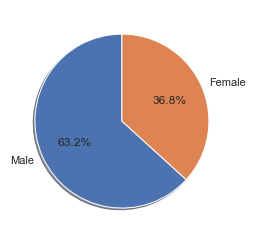

In [79]:
pieChart(train,test,both=True)

## Missing data:

In [6]:
def numerOfMissingValues(p, col, get_data = False):
    """numerOfMissingValues(pd, col, get_data = False)
       p: DataFrame
       col: column that needs to find the missing values

       Returns the total number of missing data
       return the pandas DatFrame of values if get_data is set to True
    """
    data = p[pd.isnull(p[col])]
    if get_data:
        return data
    else: 
        return len(data)

In [7]:
# As shown on info there are 891 rows of data

missing =['Age', 'Cabin','Embarked']
for i in missing:
    print("{:c} Number of values missing in {} is: {}".format(f,i,numerOfMissingValues(train,i)))
    

🞇 Number of values missing in Age is: 177
🞇 Number of values missing in Cabin is: 687
🞇 Number of values missing in Embarked is: 2


***As shown above there are 177 missing values in Age, Cabin and Embarked**

### Handling Missing Data

In [8]:
#Age: interpolate the missing data
train['Age'] = train['Age'].interpolate()
#Drop 'Name','Ticket','Cabin' because it is nor relavant to the model
cols = ['Name','Ticket','Cabin']
train = train.drop(cols,axis=1)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Converting String literals to Numeric:

In [12]:
def stringToNum(row):
    if(row.Sex)=="female":
        row.Sex = 1
    else:
        row.Sex = 2

    if(row.Embarked)=="S":
        row.Embarked = 1
    elif row.Embarked == "C":
        row.Embarked = 2
    else:
        row.Embarked = 3
        
    return row

train =train.apply(stringToNum, axis='columns')
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,2,35.0,0,0,8.0500,1
5,6,0,3,2,44.5,0,0,8.4583,3
6,7,0,1,2,54.0,0,0,51.8625,1
7,8,0,3,2,2.0,3,1,21.0750,1
8,9,1,3,1,27.0,0,2,11.1333,1
9,10,1,2,1,14.0,1,0,30.0708,2


### Classification:

In [32]:
df = train
x = df.values
y = df['Survived'].values
x = np.delete(X,1,axis=1)

In [42]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(x,y,test_size=.2)

In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6536312849162011

In [43]:
clf.feature_importances_

array([0.31795944, 0.        , 0.51058599, 0.        , 0.06833714,
       0.10311743, 0.        ])

In [45]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.5586592178770949

In [46]:
clf = ensemble.GradientBoostingClassifier()
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.5810055865921788